# Módulo 5 - Regresión Lineal

**===========================================================================================**

### 1.1 Importando datos

Vamos a trabajar con un conjunto de datos sobre alquileres de bicicletas que fue utilizado en una competencia de Kaggle


Se proporcionan datos de alquiler por hora que abarcan dos años. El conjunto de entrenamiento se compone de los primeros 19 días de cada mes, mientras que el conjunto de test es del día 20 al final del mes. **_Queremos predecir el número total de bicicletas alquiladas durante cada hora cubierta por el conjunto de test, utilizando sólo la información disponible en el set de entrenamiento._**


**CAMPOS DEL SET**

**datetime** - hourly date + timestamp

**season** -  1 = winter, 2 = spring, 3 = summer, 4 = fall

**holiday** - whether the day is considered a holiday

**workingday** - whether the day is neither a weekend nor holiday

**weather** - 

              1: Clear, Few clouds, Partly cloudy, Partly cloudy
              2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
              3: Light Snow, Light Rain + Thunderstorm + Scattered clouds,
                 Light Rain + Scattered clouds
              4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

**temp** - temperature in Celsius

**atemp** - "feels like" temperature in Celsius

**humidity** - relative humidity

**windspeed** - wind speed

**casual** - number of non-registered user rentals initiated

**registered** - number of registered user rentals initiated

**count** - number of total rentals


In [3]:
# Leemos los datos y seteamos el datetime como índice.
import pandas as pd
import numpy as np
bikes = pd.read_csv('train.csv',index_col='datetime', parse_dates=True)

In [6]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Preguntas:**

*     ¿Qué representa cada observación?
*     ¿Cuál es la variable de respuesta?
*     ¿Cuántas variables hay?

In [5]:
bikes.rename(columns={'count':'total'}, inplace=True)

### 1.2 Visualización

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos parámetros globales para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

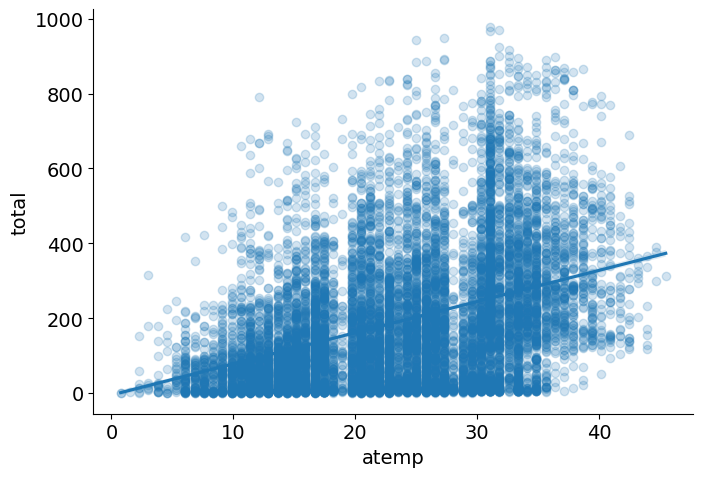

In [8]:
# Ajuste con Seaborn (modelo lineal) 
sns.lmplot(x='atemp', y='total', data=bikes, aspect=1.45, scatter_kws={'alpha':0.2})


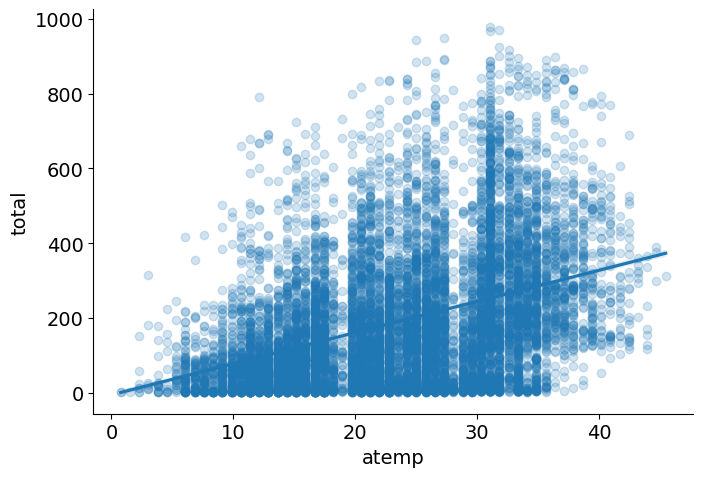

In [9]:
# Ajuste con Seaborn (modelo lineal) 
sns.lmplot(x='atemp', y='total', data=bikes, aspect=1.45, scatter_kws={'alpha':0.2})


## 2. Repaso: forma del modelo lineal

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
- $y$ es la variable dependiente (es la respuesta)
- $\beta_0$ es el término de intercepción
- $\beta_1$ es el coeficiente para $x_1$ 
- $\beta_n$ es el coeficiente para $x_n$

Los **$\beta$** son los llamados **_Coeficientes del modelo_**

- Estos valores son estimados (o "aprendidos") durante el proceso de adaptación del modelo usando el criterio **mínimos cuadrados**.
- Específicamente, encontramos la línea (matemáticamente) que minimiza la suma **de cuadrados de residuos** (o "suma de errores cuadráticos").
- Y una vez que hemos aprendido estos coeficientes, podemos usar el modelo para predecir la respuesta.

## 3. Construyendo el modelo de Regresión Lineal

Empezamos por una regresión lineal simple

In [10]:
# Creamos X e y

feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [11]:
# Importamos paquete, instanciamos el estimador y fiteamos el modelo ("classic" sklearn!)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
bikes.shape

(10886, 11)

A continuación entrenamos el modelo con el método fit

In [13]:
linreg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

6.046212959616412
[9.17054048]


Interpretación del parámetro de **intercepción** ($\beta_0$):

- Es el valor de $ y $ cuando $ x $ = 0.
- Por lo tanto, es el número estimado de alquileres cuando la temperatura es de 0 grados Celsius.
- **Nota:** No siempre tiene sentido interpretar la intercepción. (¿Por qué?)

Interpretación del coeficiente de **"temp"** ($\beta_1$):

- Es el cambio en $ y $ dividido por cambio en $ x $, o la "pendiente".
- Así, un aumento de la temperatura de 1 grado Celsius es **asociado con** un aumento de alquiler de 9.17 bicicletas.
- No se trata de una declaración de causalidad.
- $ \beta_1 $ sería **negativo** si un aumento en la temperatura se asocia con una **disminución** en los alquileres.

## 4. Usando el modelo para predecir

¿Cuántos alquileres de bicicletas podríamos predecir si la temperatura era de 25 grados Celsius?

In [ ]:
# Aplicando la fórmula manualmente
grados_celsius = 25
linreg.intercept_ + linreg.coef_ * grados_celsius

array([235.309725])

In [16]:
# usando el método del objeto
grados_celsius = np.array(25).reshape(-1,1)
linreg.predict(grados_celsius)

C:\Users\ezequ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([235.309725])

Así como el método fit es utilizado para entrenar el modelo, el método predict es utilizado para realizar las predicciones de una o más observaciones

## 5. Sumando más features

In [17]:
# creamos lista de features
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [18]:
# creamos nuevamente X and y
X = bikes[feature_cols]
y = bikes.total

# creamos el modelo y fiteamos
linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

159.52068786129755
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [19]:
print (linreg.intercept_)

159.52068786129755


In [20]:
## para observarlo mejor miramos el nombre con el coeficiente
list(zip(feature_cols, linreg.coef_))

[('temp', np.float64(7.864824992477453)),
 ('season', np.float64(22.538757532466832)),
 ('weather', np.float64(6.67030203592382)),
 ('humidity', np.float64(-3.118873382396501))]

Interpretación de los coeficientes:

- Manteniendo todas las demás características fijas, un incremento de 1 unidad en **la temperatura** se asocia con un **aumento de alquiler de 7.86 bicicletas**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **temporada** se asocia con un **aumento de alquiler de 22,5 bicicletas**.
- Manteniendo todas las demás características fijas, un incremento de 1 unidad en **tiempo** se asocia con un **aumento de alquiler de 6,67 bicicletas**.
- Manteniendo todas las otras características fijas, un aumento de 1 unidad en **humedad** se asocia con una **disminución de alquiler de 3.12 bicicletas**.

## 6. Métricas de evaluación para problemas de regresión

Las métricas de evaluación para problemas de clasificación, como **precisión**, no son útiles para problemas de regresión. Necesitamos métricas de evaluación diseñadas para comparar **valores continuos**. En las próximas clases trabajaremos más en profundidad sobre estas métricas e iremos viendo detalles de su implementación en `python`.

Aquí hay tres métricas de evaluación comunes para problemas de regresión:

**El error absoluto medio** (MAE) es la media del valor absoluto de los errores:

$$ \frac 1n\sum_ {i = 1}^n |y_i-\hat{y}_i| $$

**Mean Squared Error** (MSE) es la media de los errores al cuadrado:

$$ \frac 1n\sum_ {i = 1}^n(y_i- \hat{y}_i)^2 $$

**Error cuadrático medio raíz** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$ \sqrt{\frac 1n\sum_{i = 1}^n(y_i- \hat{y}_i)^2} $$


Comparando estas métricas:

- **MAE** es el más fácil de entender, porque es el error promedio.
- **MSE** es más popular que MAE, porque MSE "penaliza" errores grandes, y eso tiende a ser útil en el mundo real.
- **RMSE** es aún más popular que MSE, porque RMSE es interpretable en las unidades "y".

Todas estas son **funciones de pérdida**, porque queremos minimizarlas.

Ejemplo adicional, para ver cómo MSE / RMSE penalizan más a los errores más grandes:

##  Comparando modelos usando sets de entrenamiento/test y RMSE

In [21]:
from sklearn import metrics

In [22]:
from sklearn.model_selection import train_test_split

# Definimos una función que acepta una lista de features y devuelve la prueba RMSE

def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=986322)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return ({'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))})

In [23]:
# comparamos diferentes ensambles de features
print(train_test_rmse(['temp']))
print(train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print(train_test_rmse(['temp', 'season', 'weather']))
print(train_test_rmse(['temp', 'season', 'humidity']))

{'RMSE': np.float64(173.24182197683405)}
{'RMSE': np.float64(162.12425634736226)}
{'RMSE': np.float64(171.99274161493477)}
{'RMSE': np.float64(162.22103727197808)}


### 7 Comparar RMSE de Modelo con RMSE nulo (baseline)

In [24]:
# Definimos X e y para el set de entrenemiento y el de test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# creamos un array numpy con la misma forma que y_test

y_null = np.zeros_like(y_test, dtype=float)

# rellenamos el array con el valor medio de y_test

y_null.fill(y_test.mean())
y_null

array([192.26451139, 192.26451139, 192.26451139, ..., 192.26451139,
       192.26451139, 192.26451139], shape=(2722,))

In [25]:
# calculamos RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

np.float64(179.57906896465727)

## 8 Manejo de características categóricas

Scikit-learn espera que todas las funciones sean numéricas. Entonces, ¿cómo incluimos una característica categórica en nuestro modelo?

- **Categorías ordenadas:** transformarlas en valores numéricos sensibles (ejemplo: pequeño = 1, medio = 2, grande = 3)
- **Categorías no ordenadas:** utilizar codificación ficticia (0/1) (Variables-dummy)

¿Cuáles son las características categóricas de nuestro conjunto de datos?

- **Categorías ordenadas:** weather (ya codificado con valores numéricos sensibles)
- **Categorías no ordenadas:** season (necesita variables dummy), holiday (Ya está codificada como dummy), workingday (ya está codificada como dummy)

Para la temporada, no podemos simplemente dejar la codificación como 1 = primavera, 2 = verano, 3 = otoño y 4 = invierno, porque eso implicaría una **relación ordenada**. En cambio, creamos **variables dummys múltiples:**

In [27]:
# crear variables dummies
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# imprimimos para ver 5 filas cualquieras
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,False,False,True,False
2012-03-18 04:00:00,True,False,False,False
2012-10-14 17:00:00,False,False,False,True
2011-04-04 15:00:00,False,True,False,False
2012-12-11 02:00:00,False,False,False,True


Sin embargo, en realidad sólo necesitamos ** tres variables dummy (no cuatro) **, y por lo tanto vamos a dejar caer la primera variable dummy.

¿Por qué?

In [28]:
# Salteamos la primer columna
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# imprimimos 5 filas cualquieras
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,False,True,False
2012-03-18 04:00:00,False,False,False
2012-10-14 17:00:00,False,False,True
2011-04-04 15:00:00,True,False,False
2012-12-11 02:00:00,False,False,True


En general, si se tiene una feature categórica con ** k valores posibles **, se tienen que crear ** k-1 variables ficticias **.

In [29]:
# Concatenar el DataFrame original y el dummy DataFrame (axis = 0 significa filas, axis = 1 significa columnas)
bikes = pd.concat([bikes, season_dummies], axis=1)

# imprimimos 5 filas cualquieras
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,False,True,False
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,False,False,False
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,False,False,True
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,True,False,False
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,False,False,True


In [30]:
# Incluímos variables dummies

feature_cols = ['temp','season_2', 'season_3', 'season_4','humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

[('temp', np.float64(11.186405863575818)),
 ('season_2', np.float64(-3.39054309971813)),
 ('season_3', np.float64(-41.73686071317102)),
 ('season_4', np.float64(64.415961468242)),
 ('humidity', np.float64(-2.81948163625964))]

### <center> ¿Cómo interpretamos los coeficientes de season?¿Piensan que es coherente?


**los season se miden con respecto a la línea de base (winter)**:

- Manteniendo todas las demás características fijas, **spring** se asocia con un **decremento de alquiler de 3.39 bicicletas** en comparación con winter.
- Manteniendo todas las demás características fijas, **summer** se asocia con una **disminución de alquiler de 41,7 bicicletas** en comparación con winter.
- Manteniendo todas las demás características fijas, **fall** se asocia con un **aumento de alquiler de 64,4 bicicletas** en comparación con winter.

¿Qué pasa si cambiamos la dummy que se definió como la línea de base? ¿Cambiarían los efectos?

- No, simplemente cambiaría nuestra **interpretación** de los coeficientes.

**Importante:** La codificación por dummies es relevante para todos los modelos de aprendizaje automático, no sólo para los modelos de regresión lineal.

In [31]:
# comparar modelo con la feature season contra modelo con variables dummy.

print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

{'RMSE': np.float64(162.22103727197808)}
{'RMSE': np.float64(160.29525264728147)}


# 9. Conclusiones: Comparación de la regresión lineal con otros modelos

Ventajas de la regresión lineal:

- Simple de explicar
- Muy interpretable
- El entrenamiento y predicción de modelos son rápidos
- No se requiere ajuste (excluyendo la regularización)
- Las features no necesitan escala
- Puede funcionar bien con un pequeño número de observaciones

Desventajas de la regresión lineal:

- Presume una relación lineal entre las features y la respuesta
- El rendimiento es (generalmente) no competitivo con los mejores métodos de aprendizaje supervisado debido a un alto sesgo